In [1]:
from baker_bird import BakerBird
from naive import NaiveSearch
from input_generator import InputGenerator
from timeit import timeit
import matplotlib.pyplot as plt
import numpy as np
from math import floor, sqrt
from random import randint
plt.rcParams["figure.figsize"] = (8,5)

In [2]:
def generate_sizes(N):
    m = floor(sqrt(N))
    while N % m != 0:
        m = m - 1
    n = N // m
    a = randint(max(m // 20, 1), m // 2)
    b = randint(max(n // 20, 1), n // 2)
    return m, n, a, b

In [3]:
times_bb = []
times_ns = []
xs = []
bb_strategy = BakerBird()
ns_strategy = NaiveSearch()
N = 100
for _ in range(30):
    bb = []
    ns = []
    for _ in range(100):
        m, n, a, b = generate_sizes(N)
        generator = InputGenerator(
            m,
            n,
            a,
            b,
            10,
            3,
            False
        )
        M, P = generator.create_matrices()
        bb_snippet = lambda: bb_strategy.find(M, P)
        ns_snippet = lambda: ns_strategy.find(M, P)
        bb.append(timeit(bb_snippet, number=1))
        ns.append(timeit(ns_snippet, number=1))
    times_bb.append(np.median(np.array(bb)))
    times_ns.append(np.median(np.array(ns)))
    xs.append(N)
    N = N + 100

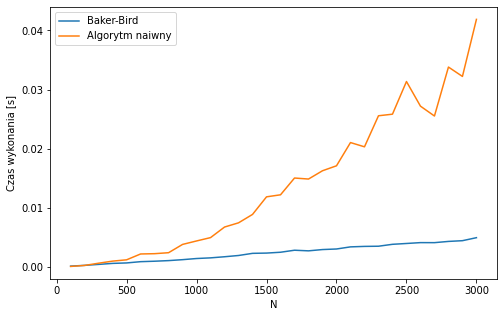

In [4]:
plt.plot(np.array(xs), np.array(times_bb), label='Baker-Bird')
plt.plot(np.array(xs), np.array(times_ns), label='Algorytm naiwny')
plt.xlabel('N')
plt.ylabel('Czas wykonania [s]')
plt.legend(loc="upper left")
plt.show()

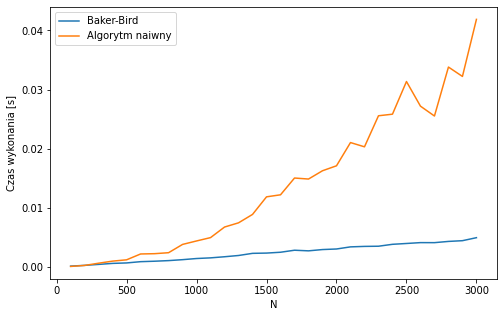

In [5]:
plt.plot(np.array(xs), np.array(times_bb), label='Baker-Bird')
plt.plot(np.array(xs), np.array(times_ns), label='Algorytm naiwny')
plt.xlabel('N')
plt.ylabel('Czas wykonania [s]')
plt.legend(loc="upper left")
plt.show()

In [6]:
correctness = []
bb_strategy = BakerBird()
ns_strategy = NaiveSearch()
N = 100
for _ in range(10):
    for _ in range(100):
        m, n, a, b = generate_sizes(N)
        generator = InputGenerator(
            m,
            n,
            a,
            b,
            10,
            3,
            False
        )
        M, P = generator.create_matrices()
        correctness.append(bb_strategy.find(M, P) == ns_strategy.find(M, P))
    N = N + 100
all(correctness)

True

In [7]:
times_bb = []
xs = []
bb_strategy = BakerBird()
N = 100
for _ in range(50):
    bb = []
    for _ in range(100):
        m, n, a, b = generate_sizes(N)
        generator = InputGenerator(
            m,
            n,
            a,
            b,
            10,
            3,
            False
        )
        M, P = generator.create_matrices()
        bb_snippet = lambda: bb_strategy.find(M, P)
        bb.append(timeit(bb_snippet, number=1))
    times_bb.append(np.median(np.array(bb)))
    xs.append(N)
    N = N + 100

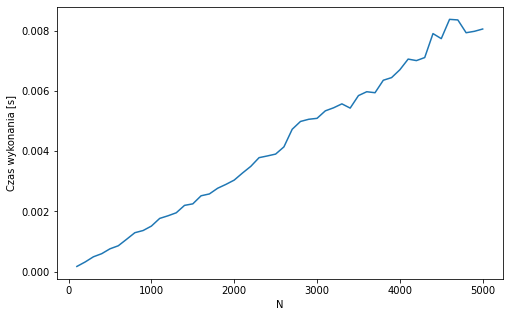

In [8]:
plt.plot(np.array(xs), np.array(times_bb))
plt.xlabel('N')
plt.ylabel('Czas wykonania [s]')
plt.show()

In [9]:
times_bb = []
times_ns = []
xs = []
bb_strategy = BakerBird()
ns_strategy = NaiveSearch()
m = 100
n = 100
a = 10
b = 10
for _ in range(10):
    bb = []
    ns = []
    generator = InputGenerator(
        m,
        n,
        a,
        b,
        10,
        3,
        True
    )
    M, P = generator.create_matrices()
    bb_snippet = lambda: bb_strategy.find(M, P)
    ns_snippet = lambda: ns_strategy.find(M, P)
    times_bb.append(timeit(bb_snippet, number=1))
    times_ns.append(timeit(ns_snippet, number=1))
    xs.append(m)
    m = m + 100
    a = a + 10

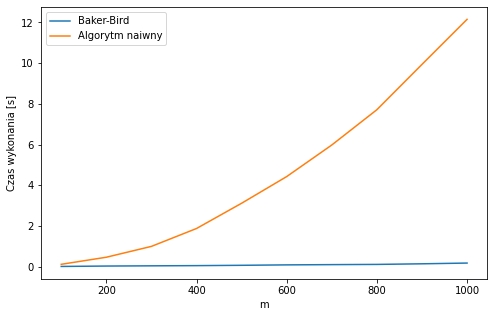

In [10]:
plt.plot(np.array(xs), np.array(times_bb), label='Baker-Bird')
plt.plot(np.array(xs), np.array(times_ns), label='Algorytm naiwny')
plt.xlabel('m')
plt.ylabel('Czas wykonania [s]')
plt.legend(loc="upper left")
plt.show()

In [11]:
times_bb = []
xs = []
bb_strategy = BakerBird()
m = 100
n = 100
a = 10
b = 10
for _ in range(50):
    bb = []
    for _ in range(10):
        generator = InputGenerator(
            m,
            n,
            a,
            b,
            10,
            3,
            True
        )
        M, P = generator.create_matrices()
        bb_snippet = lambda: bb_strategy.find(M, P)
        bb.append(timeit(bb_snippet, number=1))
    times_bb.append(np.median(np.array(bb)))
    xs.append(m)
    m = m + 100
    a = a + 10

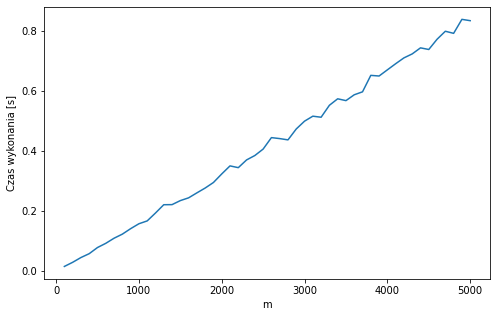

In [12]:
plt.plot(np.array(xs), np.array(times_bb))
plt.xlabel('m')
plt.ylabel('Czas wykonania [s]')
plt.show()